# K-Means Clustering of IMU and Odometry Data from TurtleBot3
### By Jacob Laframboise
Here we take in a dataset of imu data recorded from the TurtleBot3 Waffle Pi driving on 2 different surfaces at 4 different speeds each, and use K-means clustering to assign each data point to a cluster. Then we use PCA to visualize this high (118) dimension data in 2 or 3 dimensions. Matplotlib is used to plot in 2D, and Plotly is used to plot in 3D interactively, so we can better see the clusters. 

This notebook picks up from where the Python file PreprocessForKmeans.py leaves off, taking in the cleaned dataset. 

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer

import plotly as ply
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib notebook

pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 80)

In [2]:
# load data
dataFolder = r"C:\Users\jaker\Documents\RoboData-Experiment1"
data = "AllDataDfDelta26.csv"

df = pd.read_csv(os.path.join(dataFolder, data))

In [3]:
# fix index from read_csv
df = df.rename(columns={'Unnamed: 0': 'Seq'})
df = df.set_index('Seq')

In [4]:
df.head(10)

OdomPosX  OdomPosY  OdomOrientZ  OdomOrientW  OdomLinX  OdomAngZ  \
Seq                                                                       
0    101.236073  7.727499     0.271481     0.962444  0.148332  0.002560   
1    101.236847  7.727973     0.271494     0.962440  0.147744  0.004663   
2    101.237454  7.728345     0.271399     0.962467  0.148223 -0.001983   
3    101.238061  7.728717     0.271304     0.962494  0.148702 -0.008628   
4    101.238668  7.729089     0.271209     0.962520  0.149181 -0.015274   
5    101.239275  7.729461     0.271114     0.962547  0.149660 -0.021920   
6    101.239882  7.729833     0.271019     0.962574  0.150139 -0.028566   
7    101.240489  7.730205     0.270925     0.962601  0.150618 -0.035211   
8    101.241096  7.730577     0.270830     0.962627  0.151097 -0.041857   
9    101.242666  7.731535     0.270766     0.962645  0.150441 -0.031498   

     ImuOrientX  ImuOrientY  ImuOrientZ  ImuOrientW  ImuAngVelX  ImuAngVelY  \
Seq                                                                           
0      0.004440   -0.014551   -0.545528    0.837949    0.021284    0.008514   
1      0.004627   -0.015302   -0.545561    0.837913    0.013835    0.008514   
2      0.004814   -0.016052   -0.545595    0.837876    0.006385    0.008514   
3      0.004722   -0.016528   -0.545674    0.837816   -0.008514    0.013835   
4      0.004722   -0.016528   -0.545674    0.837816   -0.008514    0.013835   
5      0.004301   -0.016959   -0.545822    0.837713   -0.011706    0.032990   
6      0.004013   -0.017413   -0.545961    0.837615    0.000000    0.047889   
7      0.003634   -0.017762   -0.546075    0.837535    0.006385    0.055338   
8      0.003382   -0.017541   -0.546113    0.837516    0.009578    0.052146   
9      0.003131   -0.017320   -0.546152    0.837496    0.012770    0.048953   

     ImuAngVelZ  ImuAccelX  ImuAccelY  ImuAccelZ  TimeDelta1  TimeDelta11  \
Seq                                                                         
0      0.013835   0.246004   0.289698  10.174759    0.000030     0.056861   
1      0.000532   0.275034   0.313341   9.970354    0.008693     0.060903   
2     -0.012770   0.304064   0.336984   9.765948    0.024174     0.077493   
3     -0.039375   0.394445   0.331597  10.063428    0.000063     0.073431   
4     -0.039375   0.394445   0.331597  10.063428    0.000010     0.073410   
5     -0.053210   0.579397   0.238822  10.636241    0.000021     0.064430   
6     -0.051082   0.532710   0.277727  10.719440    0.003693     0.061541   
7     -0.042568   0.362123   0.251391  10.594342    0.000031     0.051103   
8     -0.035119   0.328305   0.154426  10.543466    0.010780     0.057554   
9     -0.027669   0.294487   0.057461  10.492589    0.007374     0.064898   

     TimeDelta21  TimeDelta31  TimeDelta41  TimeDelta51  TimeDelta61  \
Seq                                                                    
0       0.121929     0.176428     0.237168     0.291568     0.354699   
1       0.118744     0.180629     0.241271     0.295944     0.358029   
2       0.136082     0.199112     0.255646     0.315879     0.377867   
3       0.130665     0.193823     0.249332     0.311193     0.373420   
4       0.098507     0.189377     0.243809     0.300012     0.369285   
5       0.098492     0.183127     0.236515     0.295700     0.358519   
6       0.102150     0.179420     0.236055     0.292666     0.355606   
7       0.102164     0.172586     0.232254     0.288475     0.351363   
8       0.112841     0.179160     0.237479     0.294773     0.351457   
9       0.115254     0.181170     0.236987     0.296734     0.352415   

     TimeDelta71  TimeDelta81  TimeDelta91  TimeDelta101  TimeDelta111  \
Seq                                                                      
0       0.415367     0.476153     0.535056      0.593207      0.642440   
1       0.414178     0.474103     0.539442      0.596471      0.651092   
2       0.430856     0.492949     0.557108      0.616462      0.675251 

In [5]:
# check for none values and correct size
print(df.isnull().sum().sum()) # check for NaN
df.shape

0


(244905, 545)

### Feature engineering: elimination

In [6]:
# eliminate columns derived from time, and from angular velocity
columnsToDrop = [x for x in df.columns.tolist() if 'Time' in x or ('Delta' not in x and 'Odom' in x) ]
df = df.drop(columns=columnsToDrop)

### Speed filtering

In [7]:
df = df[df['Speed']==20]

### Kmeans
#### Now that we have processed the data, we can apply Kmeans to cluster it.

In [8]:
# separate labels
terrains = df['Terrain']
speeds = df['Speed']
df= df.drop(columns=['Terrain', 'Speed'])

In [9]:
# scale the values for K means
scaler = MinMaxScaler()

scaledFeatures = scaler.fit_transform(df.values)

df = pd.DataFrame(scaledFeatures, columns = df.columns.tolist())

#df = pd.DataFrame(scaler.fit_transform(df))

In [10]:
df.head(8)

ImuOrientX  ImuOrientY  ImuOrientZ  ImuOrientW  ImuAngVelX  ImuAngVelY  \
0    0.697666    0.262361    0.185536    0.953143    0.490506    0.425129   
1    0.697666    0.262361    0.185536    0.953143    0.490506    0.425129   
2    0.705433    0.264883    0.185531    0.953140    0.523734    0.401893   
3    0.713200    0.267405    0.185527    0.953138    0.556962    0.378657   
4    0.713200    0.267405    0.185527    0.953138    0.556962    0.378657   
5    0.719462    0.275193    0.185522    0.953138    0.528481    0.440620   
6    0.727111    0.286191    0.185517    0.953140    0.490506    0.521515   
7    0.718264    0.300125    0.185524    0.953151    0.424051    0.602410   

   ImuAngVelZ  ImuAccelX  ImuAccelY  ImuAccelZ  OdomPosXDelta1  \
0    0.604651   0.387481   0.575878   0.462455        0.456608   
1    0.604651   0.387481   0.575878   0.462455        0.456608   
2    0.587209   0.371426   0.545427   0.476464        0.456608   
3    0.569767   0.355370   0.514977   0.490474        0.465735   
4    0.569767   0.355370   0.514977   0.490474        0.465735   
5    0.569767   0.366443   0.465185   0.471683        0.465735   
6    0.569767   0.357585   0.447729   0.425657        0.465735   
7    0.589147   0.406305   0.397342   0.399171        0.465735   

   OdomPosXDelta11  OdomPosXDelta21  OdomPosXDelta31  OdomPosXDelta41  \
0         0.526719         0.661077         0.695168         0.757040   
1         0.515352         0.659861         0.694109         0.756950   
2         0.503985         0.658645         0.693051         0.756860   
3         0.496386         0.660350         0.694308         0.758706   
4         0.488788         0.659946         0.695564         0.760552   
5         0.481189         0.659542         0.696821         0.762398   
6         0.484957         0.659138         0.698078         0.758346   
7         0.488725         0.658734         0.699429         0.754295   

   OdomPosXDelta51  OdomPosXDelta61  OdomPosXDelta71  OdomPosXDelta81  \
0         0.843548         0.882110         0.882942         0.902817   
1         0.841739         0.874134         0.882880         0.902268   
2         0.839929         0.866158         0.882819         0.901719   
3         0.839809         0.859662         0.884076         0.902350   
4         0.839688         0.859577         0.885334         0.902981   
5         0.839567         0.859492         0.885296         0.893116   
6         0.810337         0.859408         0.885258         0.883252   
7         0.781107         0.859323         0.885220         0.884377   

   OdomPosXDelta91  OdomPosXDelta101  OdomPosXDelta111  OdomPosXDelta121  \
0         0.881011          0.900914          0.904111          0.909375   
1         0.879946          0.900869          0.904079          0.909001   
2         0.878882          0.900824          0.904047          0.908626   
3         0.878852          0.901755          0.904906          0.909071   
4         0.876523          0.902686          0.905765          0.909516   
5         0.874194          0.903617          0.906625          0.909961   
6         0.871865          0.904548          0.907484          0.905682   
7         0.869536          0.905479          0.902866          0.901403   

   OdomPosXDelta131  OdomPosXDelta141  OdomPosXDelta151  OdomPosXDelta161  \
0          0.917111          0.928502          0.927728          0.936482   
1          0.917053          0.925211          0.927016          0.934421   
2          0.916995          0.921919          0.926305          0.932361   
3          0.916933          0.919353          0.926275          0.932333   
4          0.916871          0.916786          0.926246          0.932305   
5          0.916808          0.917457          0.926197          0.932277   
6          0.916746          0.918128          0.926149          0.932249   
7          0.916684          0.918799          0.926100          0.932222   

   OdomPosXDelta171

In [11]:
# apply K means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

In [13]:
# re add labels
df['Cluster'] = labels
df['Speed'] = speeds.values
df['Terrain'] = terrains.values

In [14]:
df.head(10)

ImuOrientX  ImuOrientY  ImuOrientZ  ImuOrientW  ImuAngVelX  ImuAngVelY  \
0    0.697666    0.262361    0.185536    0.953143    0.490506    0.425129   
1    0.697666    0.262361    0.185536    0.953143    0.490506    0.425129   
2    0.705433    0.264883    0.185531    0.953140    0.523734    0.401893   
3    0.713200    0.267405    0.185527    0.953138    0.556962    0.378657   
4    0.713200    0.267405    0.185527    0.953138    0.556962    0.378657   
5    0.719462    0.275193    0.185522    0.953138    0.528481    0.440620   
6    0.727111    0.286191    0.185517    0.953140    0.490506    0.521515   
7    0.718264    0.300125    0.185524    0.953151    0.424051    0.602410   
8    0.709982    0.302743    0.185533    0.953160    0.419304    0.625645   
9    0.701699    0.305360    0.185542    0.953168    0.414557    0.648881   

   ImuAngVelZ  ImuAccelX  ImuAccelY  ImuAccelZ  OdomPosXDelta1  \
0    0.604651   0.387481   0.575878   0.462455        0.456608   
1    0.604651   0.387481   0.575878   0.462455        0.456608   
2    0.587209   0.371426   0.545427   0.476464        0.456608   
3    0.569767   0.355370   0.514977   0.490474        0.465735   
4    0.569767   0.355370   0.514977   0.490474        0.465735   
5    0.569767   0.366443   0.465185   0.471683        0.465735   
6    0.569767   0.357585   0.447729   0.425657        0.465735   
7    0.589147   0.406305   0.397342   0.399171        0.465735   
8    0.596899   0.419462   0.405673   0.385909        0.465735   
9    0.604651   0.432619   0.414005   0.372646        0.472411   

   OdomPosXDelta11  OdomPosXDelta21  OdomPosXDelta31  OdomPosXDelta41  \
0         0.526719         0.661077         0.695168         0.757040   
1         0.515352         0.659861         0.694109         0.756950   
2         0.503985         0.658645         0.693051         0.756860   
3         0.496386         0.660350         0.694308         0.758706   
4         0.488788         0.659946         0.695564         0.760552   
5         0.481189         0.659542         0.696821         0.762398   
6         0.484957         0.659138         0.698078         0.758346   
7         0.488725         0.658734         0.699429         0.754295   
8         0.492493         0.658330         0.700780         0.750243   
9         0.499016         0.660063         0.703824         0.747607   

   OdomPosXDelta51  OdomPosXDelta61  OdomPosXDelta71  OdomPosXDelta81  \
0         0.843548         0.882110         0.882942         0.902817   
1         0.841739         0.874134         0.882880         0.902268   
2         0.839929         0.866158         0.882819         0.901719   
3         0.839809         0.859662         0.884076         0.902350   
4         0.839688         0.859577         0.885334         0.902981   
5         0.839567         0.859492         0.885296         0.893116   
6         0.810337         0.859408         0.885258         0.883252   
7         0.781107         0.859323         0.885220         0.884377   
8         0.782717         0.859238         0.885183         0.885503   
9         0.785562         0.860236         0.886109         0.887491   

   OdomPosXDelta91  OdomPosXDelta101  OdomPosXDelta111  OdomPosXDelta121  \
0         0.881011          0.900914          0.904111          0.909375   
1         0.879946          0.900869          0.904079          0.909001   
2         0.878882          0.900824          0.904047          0.908626   
3         0.878852          0.901755          0.904906          0.909071   
4         0.876523          0.902686          0.905765          0.909516   
5         0.874194          0.903617          0.906625          0.909961   
6         0.871865          0.904548          0.907484          0.905682   
7         0.869536          0.905479          0.902866          0.901403   
8         0.870090          0.905451          0.898248          0.897124   
9         0.871400          0.906137          0.894282      

In [15]:
# alias the PCA function
pca_1d = PCA(n_components=1)
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

In [16]:
# apply PCA on the data for visualization
pc1Df = pd.DataFrame(pca_1d.fit_transform(df.drop(columns=['Cluster', 'Speed', 'Terrain'])))
pc2Df = pd.DataFrame(pca_2d.fit_transform(df.drop(columns=['Cluster', 'Speed', 'Terrain'])))
pc3Df = pd.DataFrame(pca_3d.fit_transform(df.drop(columns=['Cluster', 'Speed', 'Terrain'])))

In [17]:
pc1Df.columns = ["PC1_1d"]
pc2Df.columns = ["PC1_2d", "PC2_2d"]
pc3Df.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [18]:
pc3Df.head()

PC1_3d    PC2_3d    PC3_3d
0 -1.086611 -0.485481  0.696577
1 -1.080312 -0.484560  0.695385
2 -1.074527 -0.481532  0.691614
3 -1.074085 -0.479593  0.688163
4 -1.070430 -0.478544  0.682031

In [19]:
pc3Df.tail()

PC1_3d    PC2_3d    PC3_3d
28197  0.251934 -1.782661 -2.573485
28198  0.252598 -1.775363 -2.559039
28199  0.236841 -1.787000 -2.529776
28200  0.222064 -1.794388 -2.499697
28201  0.202854 -1.811801 -2.453161

In [20]:
# add pca columns to data
df = pd.concat([df, pc1Df, pc2Df, pc3Df], axis=1, join='inner')
df['Zeros']=0

In [21]:
# separate clusters to dataframes
c0 = df[df['Cluster']==0]
c1 = df[df['Cluster']==1]
c2 = df[df['Cluster']==2]
c3 = df[df['Cluster']==3]
# c4 = df[df['Cluster']==4]
# c5 = df[df['Cluster']==5]
# c6 = df[df['Cluster']==6]
# c7 = df[df['Cluster']==7]

In [22]:
# separate data by actuall terrain
tile = df[df['Terrain']=='MitTile']
turf = df[df['Terrain']=='Turf']
arcTile = df[df['Terrain']=='ArcTile']
carp = df[df['Terrain']=='Carp']

In [23]:
# smaller dataframe without all ~100 features
results = df[['Cluster', 'Terrain', 'Speed']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DE16B12088>]],
      dtype=object)

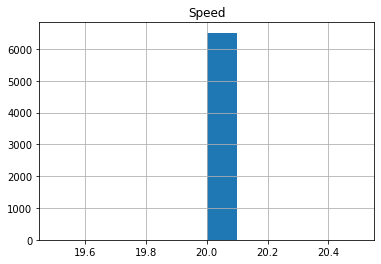

In [24]:
# look at distribution of speeds in a cluster
results[results.Cluster==1].drop(columns=['Cluster', 'Terrain']).hist()

In [25]:
# look at which clusters contain mostly one surface or another
for c in range(4):
    print(c)
    r = results[results.Cluster==c].drop(columns='Speed')
    print(r.groupby('Terrain').count())
    print('\n')

0
         Cluster
Terrain         
ArcTile     3180


1
         Cluster
Terrain         
Carp        2668
Turf        3842


2
         Cluster
Terrain         
ArcTile     3292
Carp         717
MitTile     7203
Turf        3872


3
         Cluster
Terrain         
Carp        3428




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DE16A45EC8>]],
      dtype=object)

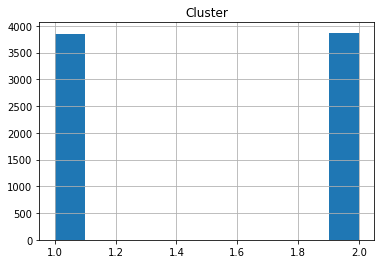

In [26]:
# show which clusters have turf terrain
results[results['Terrain']=='Turf'].drop(columns='Speed').hist()

### Visualization: PCA components

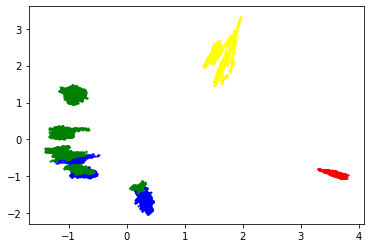

In [27]:
# matplotlib for 2D plotting of clusters
plt.figure()
plt.scatter(x=c0['PC1_2d'], y=c0['PC2_2d'], c='red', s=1)
plt.scatter(x=c1['PC1_2d'], y=c1['PC2_2d'], c='blue', s=1)
plt.scatter(x=c2['PC1_2d'], y=c2['PC2_2d'], c='green', s=1)
plt.scatter(x=c3['PC1_2d'], y=c3['PC2_2d'], c='yellow', s=1)
# plt.scatter(x=c4['PC1_2d'], y=c4['PC2_2d'], c='orange', s=1)
# plt.scatter(x=c5['PC1_2d'], y=c5['PC2_2d'], c='brown', s=1)
# plt.scatter(x=c6['PC1_2d'], y=c6['PC2_2d'], c='grey', s=1)
# plt.scatter(x=c7['PC1_2d'], y=c7['PC2_2d'], c='purple', s=1)

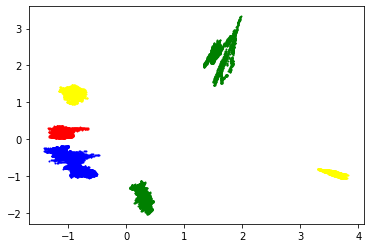

In [28]:
# 2D plot of terrains
plt.figure()
plt.scatter(x=tile['PC1_2d'], y=tile['PC2_2d'], c='red', s=1)
plt.scatter(x=turf['PC1_2d'], y=turf['PC2_2d'], c='blue', s=1)
plt.scatter(x=carp['PC1_2d'], y=carp['PC2_2d'], c='green', s=1)
plt.scatter(x=arcTile['PC1_2d'], y=arcTile['PC2_2d'], c='yellow', s=1)

In [29]:
init_notebook_mode(connected=True)

In [30]:
# plotly for interactive 3D plot of clusters
t0 = go.Scatter3d(x=c0['PC1_3d'], y=c0['PC2_3d'], z=c0['PC3_3d'],
               mode="markers", name="Cluster 0",
               marker = dict(color = 'purple'),
               text=None)
t1 = go.Scatter3d(x=c1['PC1_3d'], y=c1['PC2_3d'], z=c1['PC3_3d'],
               mode="markers", name="Cluster 1",
               marker = dict(color = 'brown'),
               text=None)
t2 = go.Scatter3d(x=c2['PC1_3d'], y=c2['PC2_3d'], z=c2['PC3_3d'],
               mode="markers", name="Cluster 2",
               marker = dict(color = 'grey'),
               text=None)
t3 = go.Scatter3d(x=c3['PC1_3d'], y=c3['PC2_3d'], z=c3['PC3_3d'],
               mode="markers", name="Cluster 3",
               marker = dict(color = 'blue'),
               text=None)
# t4 = go.Scatter3d(x=c4['PC1_3d'], y=c4['PC2_3d'], z=c4['PC3_3d'],
#                mode="markers", name="Cluster 4",
#                marker = dict(color = 'green'),
#                text=None)
# t5 = go.Scatter3d(x=c5['PC1_3d'], y=c5['PC2_3d'], z=c5['PC3_3d'],
#                mode="markers", name="Cluster 5",
#                marker = dict(color = 'orange'),
#                text=None)
# t6 = go.Scatter3d(x=c6['PC1_3d'], y=c6['PC2_3d'], z=c6['PC3_3d'],
#                mode="markers", name="Cluster 6",
#                marker = dict(color = 'red'),
#                text=None)
# t7 = go.Scatter3d(x=c7['PC1_3d'], y=c7['PC2_3d'], z=c7['PC3_3d'],
#                mode="markers", name="Cluster 7",
#                marker = dict(color = 'yellow'),
#                text=None)
plotData = [t0, t1, t2, t3] #, t4, t5, t6, t7]
title = "IMU Clustering"
layout = dict(title=title, xaxis=dict(title='PC1',ticklen= 5,zeroline= False), yaxis=dict(title= '',ticklen= 5,zeroline= False))

fig=dict(data=plotData, layout=layout)

In [31]:
iplot(fig)

In [32]:
# plotly for interactive 3D plot of terrains
tilePlot = go.Scatter3d(x=tile['PC1_3d'], y=tile['PC2_3d'], z=tile['PC3_3d'],
               mode="markers", name="Tile",
               marker = dict(color = 'purple'),
               text=None)
turfPlot = go.Scatter3d(x=turf['PC1_3d'], y=turf['PC2_3d'], z=turf['PC3_3d'],
               mode="markers", name="Turf",
               marker = dict(color = 'brown'),
               text=None)
carpPlot = go.Scatter3d(x=carp['PC1_3d'], y=carp['PC2_3d'], z=carp['PC3_3d'],
               mode="markers", name="Carpet",
               marker = dict(color = 'green'),
               text=None)
arcTilePlot = go.Scatter3d(x=arcTile['PC1_3d'], y=arcTile['PC2_3d'], z=arcTile['PC3_3d'],
               mode="markers", name="ArcTile",
               marker = dict(color = 'red'),
               text=None)

plotData = [tilePlot, turfPlot, carpPlot, arcTilePlot]
title = "IMU Clustering Tile vs Turf vs Carpet vs Arc Tile"
layout = dict(title=title, xaxis=dict(title='PC1',ticklen= 5,zeroline= False), yaxis=dict(title= '',ticklen= 5,zeroline= False))

fig2=dict(data=plotData, layout=layout)

In [33]:
iplot(fig2)

Therefore we can see that K means clustering does a reasonable job of partitioning data into clusters that are mostly one terrain or the other. We can see that the two terrains are roughly seperable in 3 principle components, and likely more separable in high dimension space. 